# Data Analysis of Import Data

In [1]:
# importng pandas and setting some default rows and columns size
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.available
plt.style.use('fast')

In [3]:
# %matplotlib notebook

In [4]:
#reading data files
df = pd.read_csv("../Data/2018-2010_export.csv")
df.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.",0.00,AFGHANISTAN TIS,2018
2,4,"DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


### Value of commodities in million US$

In [5]:
# HSCode and there description

HSDesc = df.drop_duplicates(subset ="HSCode") 
HSDesc = HSDesc.sort_values('HSCode')[['HSCode','Commodity']]
HSDesc = HSDesc.reset_index(drop = True)
HSDesc

,HSCode,Commodity
0,1,LIVE ANIMALS.
1,2,MEAT AND EDIBLE MEAT OFFAL.
2,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES."
3,4,"DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED."
4,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED."
5,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.
6,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
7,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.
8,9,"COFFEE, TEA, MATE AND SPICES."
9,10,CEREALS.


In [6]:
# Checking for the nulls
df.isna().sum()

HSCode       0    
Commodity    0    
value        14038
country      0    
year         0    
dtype: int64

### Value of some of the column is nulls, that we will handle afterwards, for now we'll ignore the null tuples 

# Now we will plot the Total sum amount of each HSCode which we import

Text(0.5, 1.0, 'Total Value of each HSCode we import')

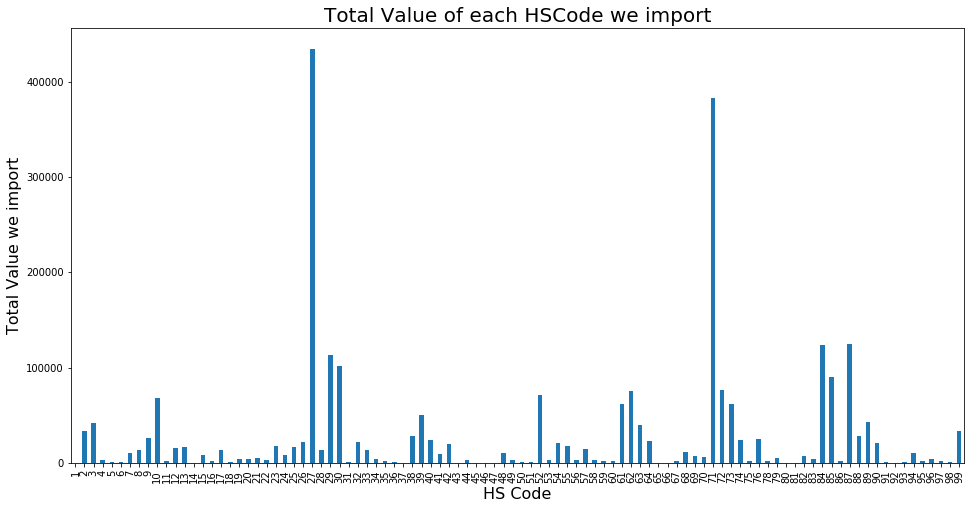

In [7]:
# showing HSCode and there import trade
df.groupby(["HSCode"]).sum()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value we import', fontsize = 16)
plt.xlabel('HS Code', fontsize = 16)
# plt.xticks(rotation=20)
plt.title('Total Value of each HSCode we import', fontsize = 20)

Text(0.5, 1.0, 'Total Value of Top 15 HSCode India export')

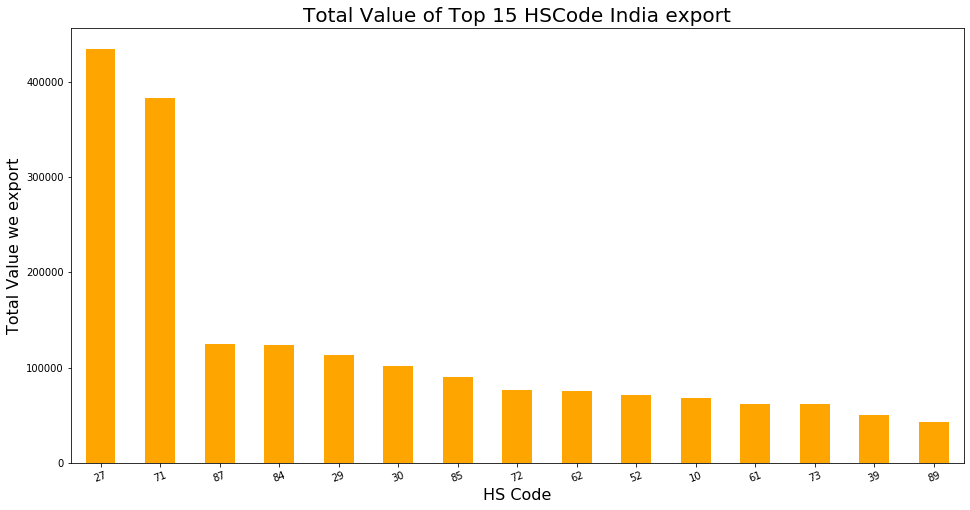

In [25]:
# top 15 HSCode import 
df.groupby(["HSCode"]).sum().nlargest(15,['value'])['value'].plot.bar(figsize= (16,8), color = 'Orange')
plt.ylabel('Total Value we export', fontsize = 16)
plt.xlabel('HS Code', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total Value of Top 15 HSCode India export', fontsize = 20)

### Above HSCode Description

In [9]:
# displaying the above 15 HSCode with there descriptions for better uderstanding.
HSDesc[HSDesc['HSCode'].isin(df.groupby(["HSCode"]).sum().nlargest(15,['value']).index.values)]

,HSCode,Commodity
9,10,CEREALS.
26,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."
28,29,ORGANIC CHEMICALS
29,30,PHARMACEUTICAL PRODUCTS
38,39,PLASTIC AND ARTICLES THEREOF.
51,52,COTTON.
60,61,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED."
61,62,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED."
70,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."
71,72,IRON AND STEEL


# For the HS Code, first 15 of the highest importing countries

### HSCode 27 - MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 27')

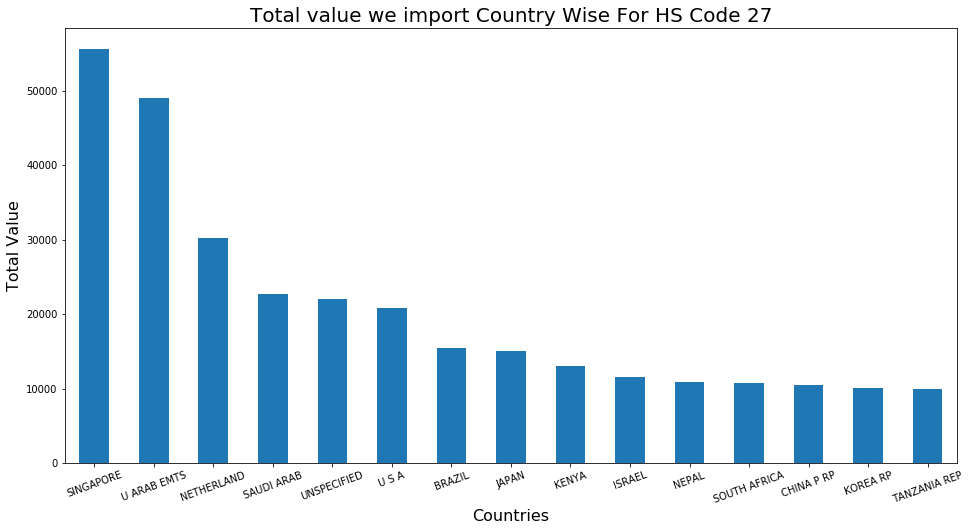

In [10]:
df[df['HSCode']==27].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 27', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 27')

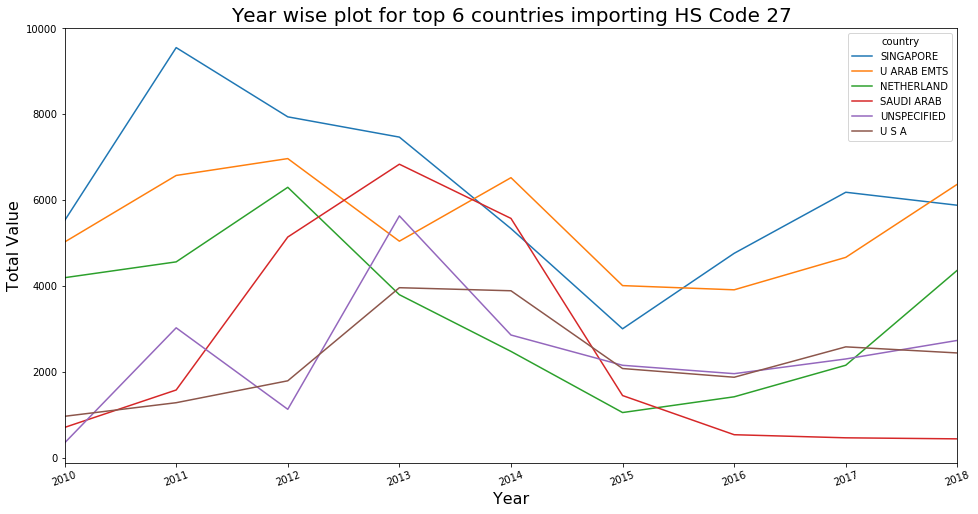

In [11]:
countries = df[df['HSCode']==27].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==27].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 27', fontsize = 20)

### HSCode 71 - NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 71')

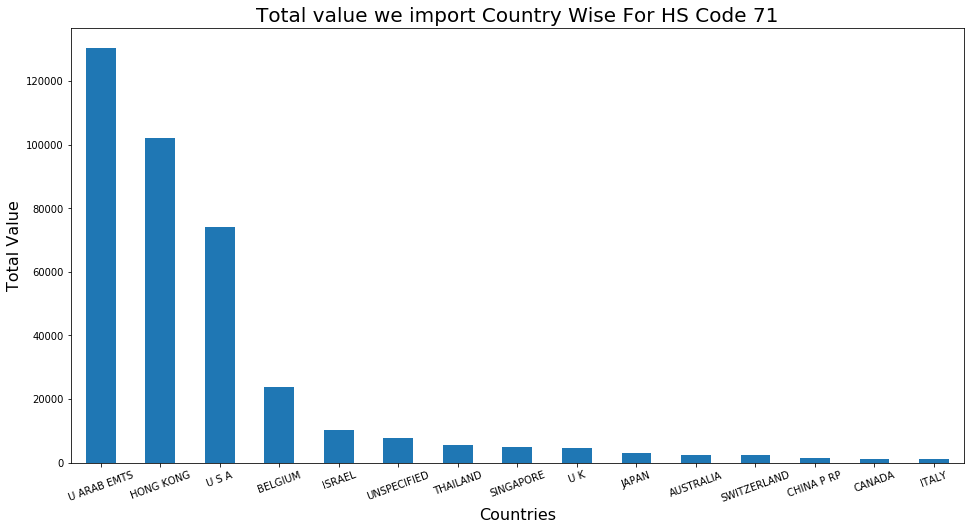

In [12]:
df[df['HSCode']==71].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 71', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 71')

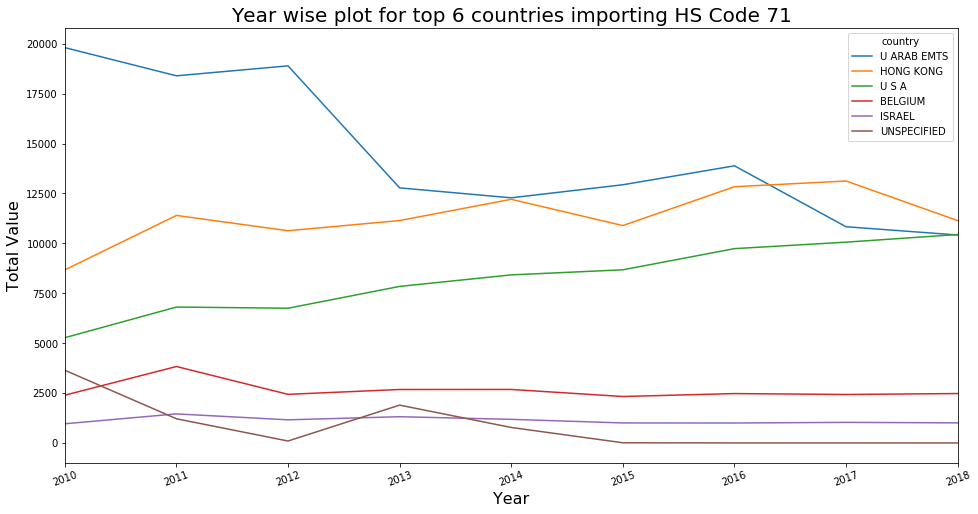

In [13]:
countries = df[df['HSCode']==71].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==71].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 71', fontsize = 20)

### HSCode 85 - ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 85')

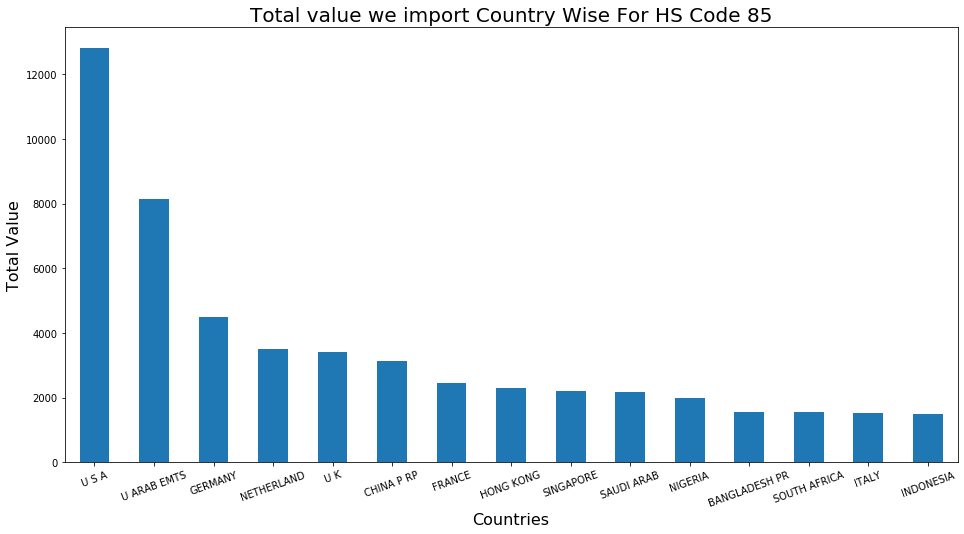

In [14]:
df[df['HSCode']==85].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 85', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 85')

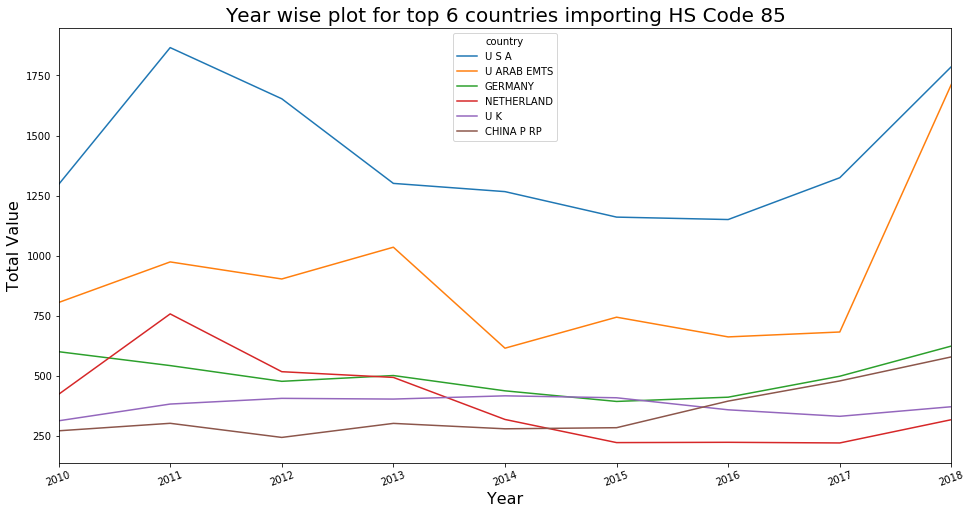

In [15]:
countries = df[df['HSCode']==85].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==85].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 85', fontsize = 20)

### HSCode 84 - NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 84')

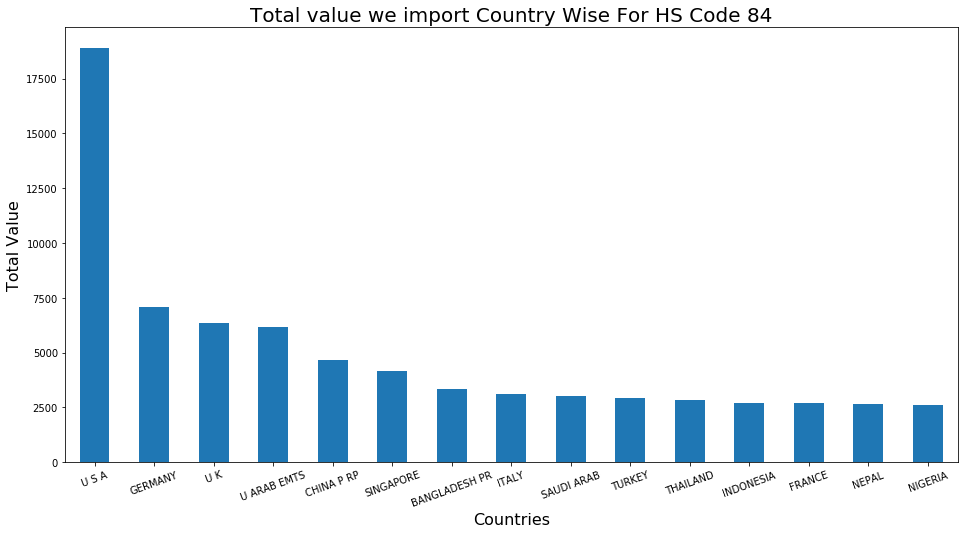

In [16]:
df[df['HSCode']==84].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 84', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 84')

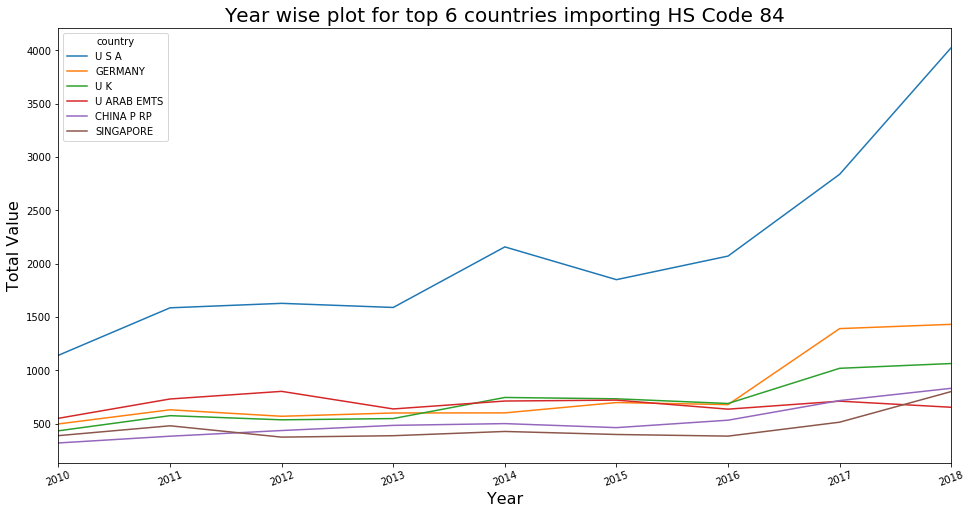

In [17]:
countries = df[df['HSCode']==84].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==84].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 84', fontsize = 20)

### HSCode 29 - ORGANIC CHEMICALS

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 29')

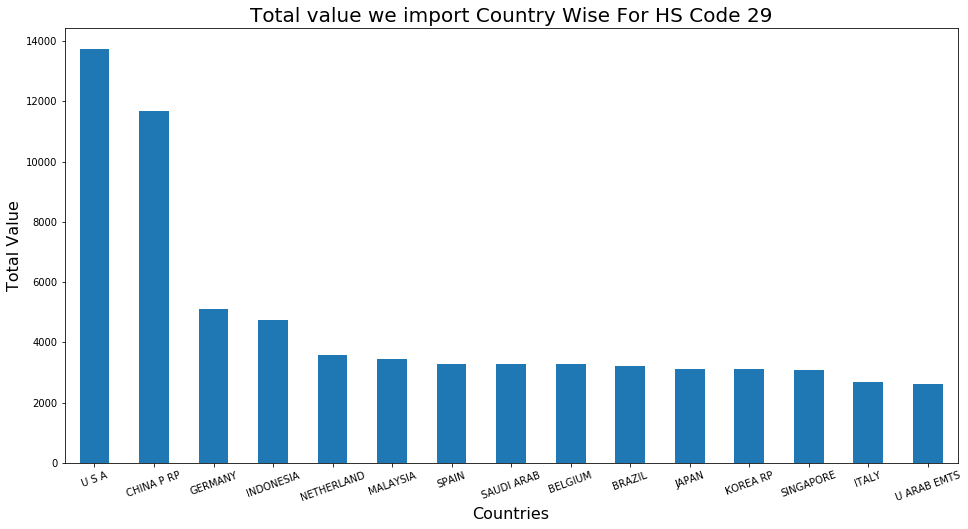

In [18]:
df[df['HSCode']==29].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 29', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 29')

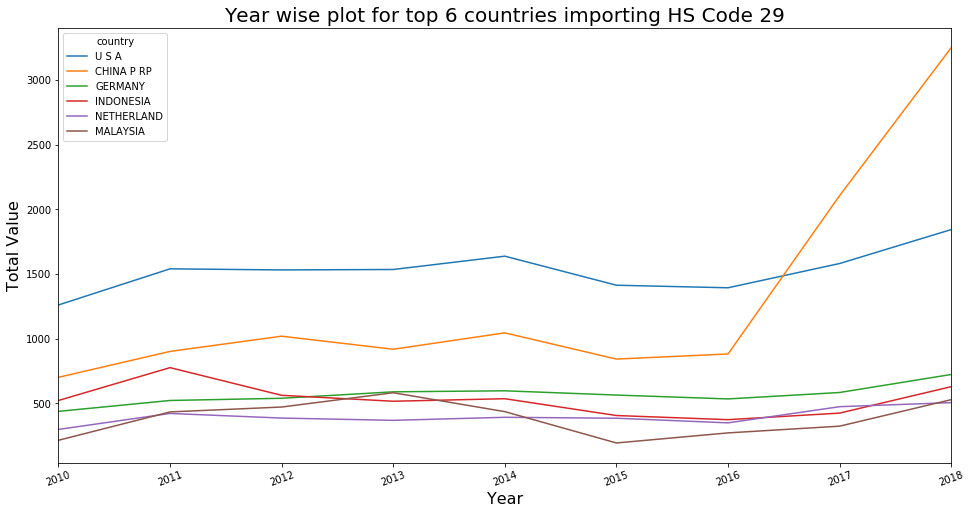

In [19]:
countries = df[df['HSCode']==29].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==29].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 29', fontsize = 20)

# Year Wise import plot

Text(0.5, 1.0, 'Total value we import every year')

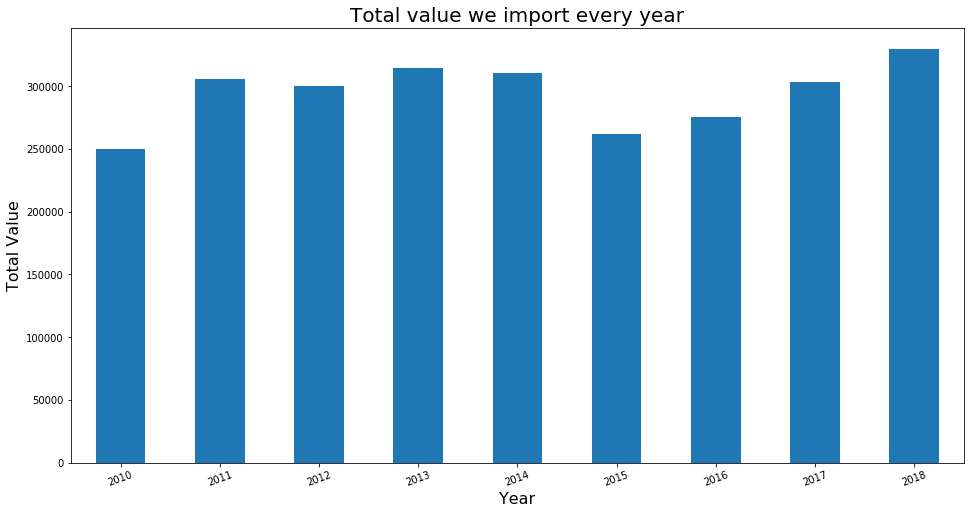

In [20]:
# year wise import plot
df.groupby(['year']).sum()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import every year', fontsize = 20)

# Countries Wise import plot
### Considering only top 15 countries as list of all countries is huge

Text(0.5, 1.0, 'Total value India export Country Wise')

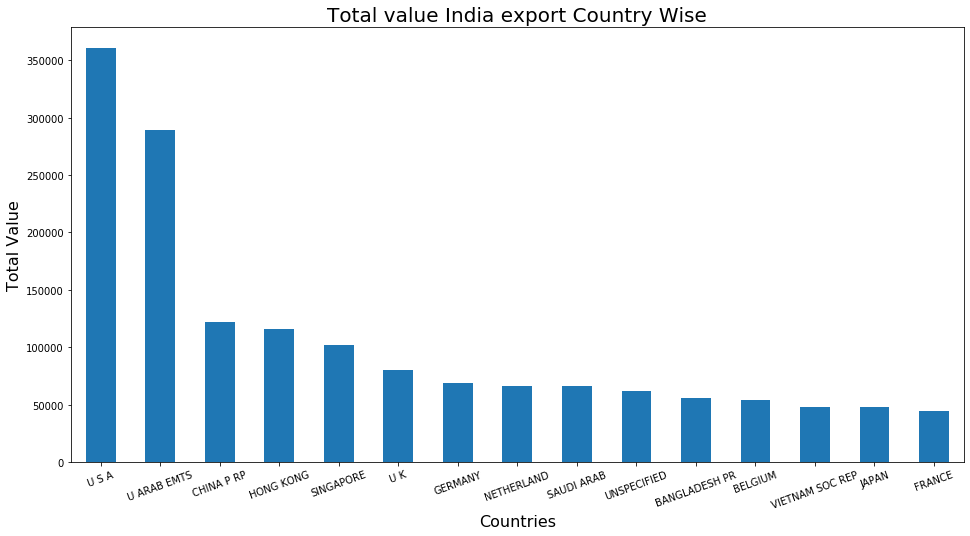

In [27]:
# country wise value plot for highest 15 countries
df.groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value India export Country Wise', fontsize = 20)

## Year Wise Max importing country values

In [22]:
df.groupby(['country','year']).sum()['value'].unstack()


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
AFGHANISTAN TIS,422.31,510.81,472.55,474.26,422.48,526.51,506.26,709.66,715.35
ALBANIA,11.49,12.61,17.47,18.71,19.44,24.00,26.43,29.29,37.07
ALGERIA,781.92,835.59,1088.67,1069.44,1063.65,787.74,841.81,823.18,940.24
AMERI SAMOA,0.20,2.05,0.37,0.06,0.19,0.14,0.07,0.29,0.03
ANDORRA,0.27,0.24,0.10,0.12,0.25,0.11,0.13,4.72,0.34
ANGOLA,675.41,454.25,488.73,535.97,552.58,223.14,154.54,234.86,282.26
ANGUILLA,0.16,0.11,0.13,0.02,0.04,0.01,0.04,0.50,0.16
ANTARTICA,0.16,0.06,0.17,0.07,0.00,0.00,0.00,0.10,0.00
ANTIGUA,0.95,0.86,1.34,2.18,2.07,2.55,1.98,2.12,2.67


In [23]:
df.groupby(['country','year']).sum()['value'].unstack().idxmax()


year
2010    U ARAB EMTS
2011    U ARAB EMTS
2012    U ARAB EMTS
2013    U S A      
2014    U S A      
2015    U S A      
2016    U S A      
2017    U S A      
2018    U S A      
dtype: object

Text(0.5, 1.0, 'Total value we import every year from China')

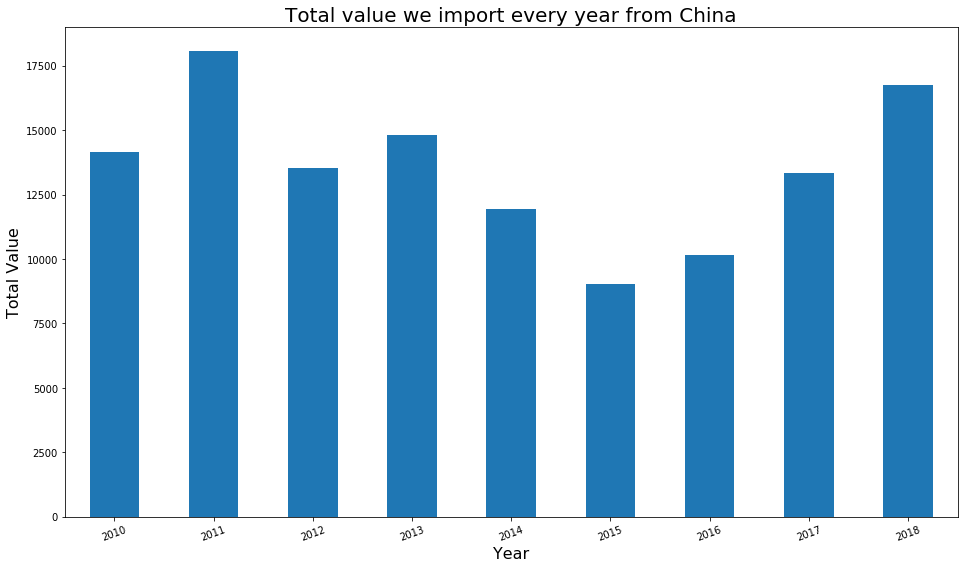

In [24]:
df[df['country'] == 'CHINA P RP'].groupby(['year']).sum()['value'].plot.bar(figsize = (16,9))
# df[df['country'] == 'CHINA P RP'].groupby(['year']).sum()['value'].plot(figsize = (16,9))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import every year from China', fontsize = 20)